# <font color = "red"> Linear Regression - Bike Sharing Assignment

### <font color='green'>Introduction

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

### <font color='green'>Problem Statement
    
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
    
- How well those variables describe the bike demands
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### <font color='green'>Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## <font color='indigo'>Importing the libraries & warnings.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>"))

## <font color='indigo'>Import Data

In [4]:
#Read the dataset and check the first five rows
bsd_df = pd.read_csv("day.csv")
bsd_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## <font color='indigo'>Data Understanding
    
1. **'day.csv'** have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
# Check the shape of the dataframe
bsd_df.shape

(730, 16)

In [6]:
# Check the datatypes and non-null value count of all the columns of the dataframe
bsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Check the quantitative spread of this dataset
bsd_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## <font color='indigo'>Removing Unneccessary Columns

##### We can drop the below columns as 
- instant shows only the index number of the row.
- dteday has date, month and year which is repeated in mnth and yr column.
- The 'cnt' variable indicates the total number of bike rentals, including both casual and registered. 
  The model should be built taking this 'cnt' as the target variable. So we can drop both registered and cnt.

In [8]:
bsd_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# dropping unwanted columns
bsd_df = bsd_df.drop(["instant", "dteday", "registered", "casual"], axis=1)
bsd_df.shape

(730, 12)

## <font color='indigo'> Checking for Null values and Duplicates

In [10]:
bsd_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**We dont have any null values in the dataset.**

In [11]:
# checking for duplicates
bsd_dup = bsd_df.duplicated()
bsd_dup

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [12]:
bsd_dup.nunique()

1

**From the above we can say there are no duplicate values.**

## <font color='indigo'>Checking Datatypes

In [13]:
# Checking data types.
bsd_df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Some of the variables like 'season', 'month', 'weekday' and 'weathersit' have values as 0,1,2,3,4,5,6 which have specific labels associated with them (as can be seen in the data dictionary)                                  

The numeric values associated with the labels may indicate that there is some order to them - which is actually not the case .  So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

Year column consist of 2 values with 0 corresponding to 2018 & 1 corresponding to 2019.But we will keep this values as it is since values are only 0 and 1.

**weathersit** represents the weather situation. Number 1,2,3,4 are mapped as follows:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

To make it lucid we can write the above as follows:

 - Clear
 
 - Mist
 
 - Light
 
 - Heavy

In [14]:
# Changing categorical data which were numeric into categorical string values
bsd_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bsd_df.weathersit.replace({1:'Clear',2:'Mist',3:'Light',4:'Heavy'},inplace = True)

bsd_df.mnth = bsd_df.mnth.replace({1: 'january',2: 'february',3: 'march',4: 'april',5: 'may',6: 'june',
                  7: 'july',8: 'august',9: 'september',10: 'october',11: 'november',12: 'december'})

bsd_df.weekday = bsd_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bsd_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [16]:
bsd_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## <font color='indigo'>Visualising the Data

We carry out visualising data to find:

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### <font color = "green">**Visualising Numeric Variables**

Let's make a pairplot of all the numeric variables

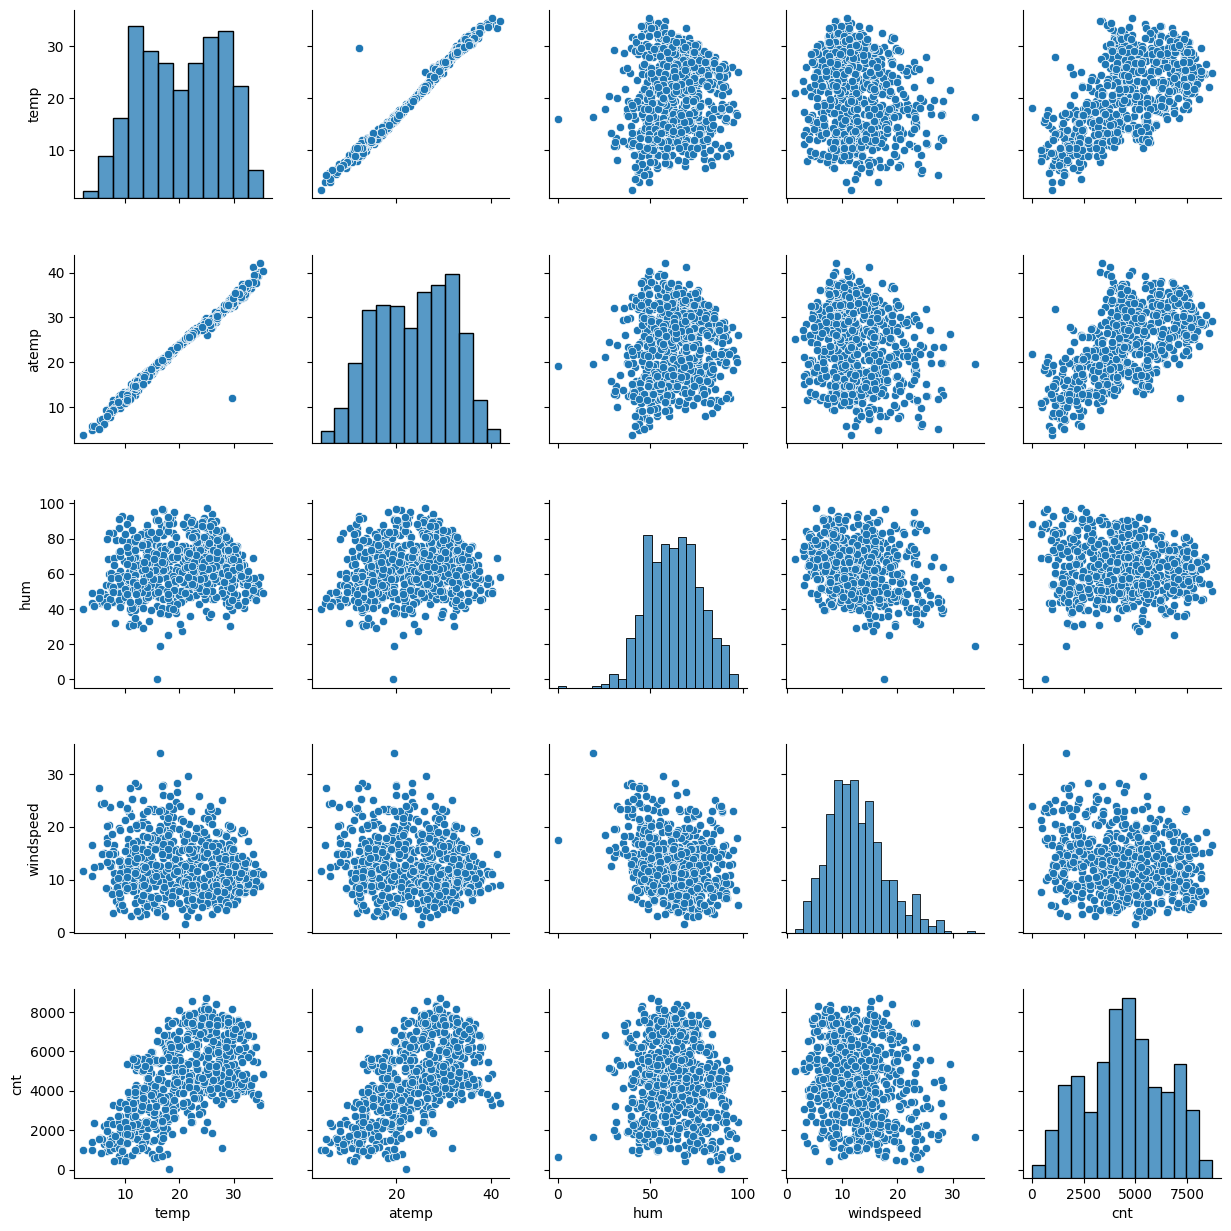

In [17]:
sns.pairplot(data = bsd_df, vars = ['temp','atemp', 'hum', 'windspeed', 'cnt'])
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

From the above we can infere that **temp** and **atemp** shows a positive corelation with the target variable **cnt** and that there is a linear relation between them

#### <font color = "green">**Visualising categorical Variables**

There are a few variables namely season,mnth,yr,weekday, holiday, working day and weathersit. Let's make a boxplot for these variables 

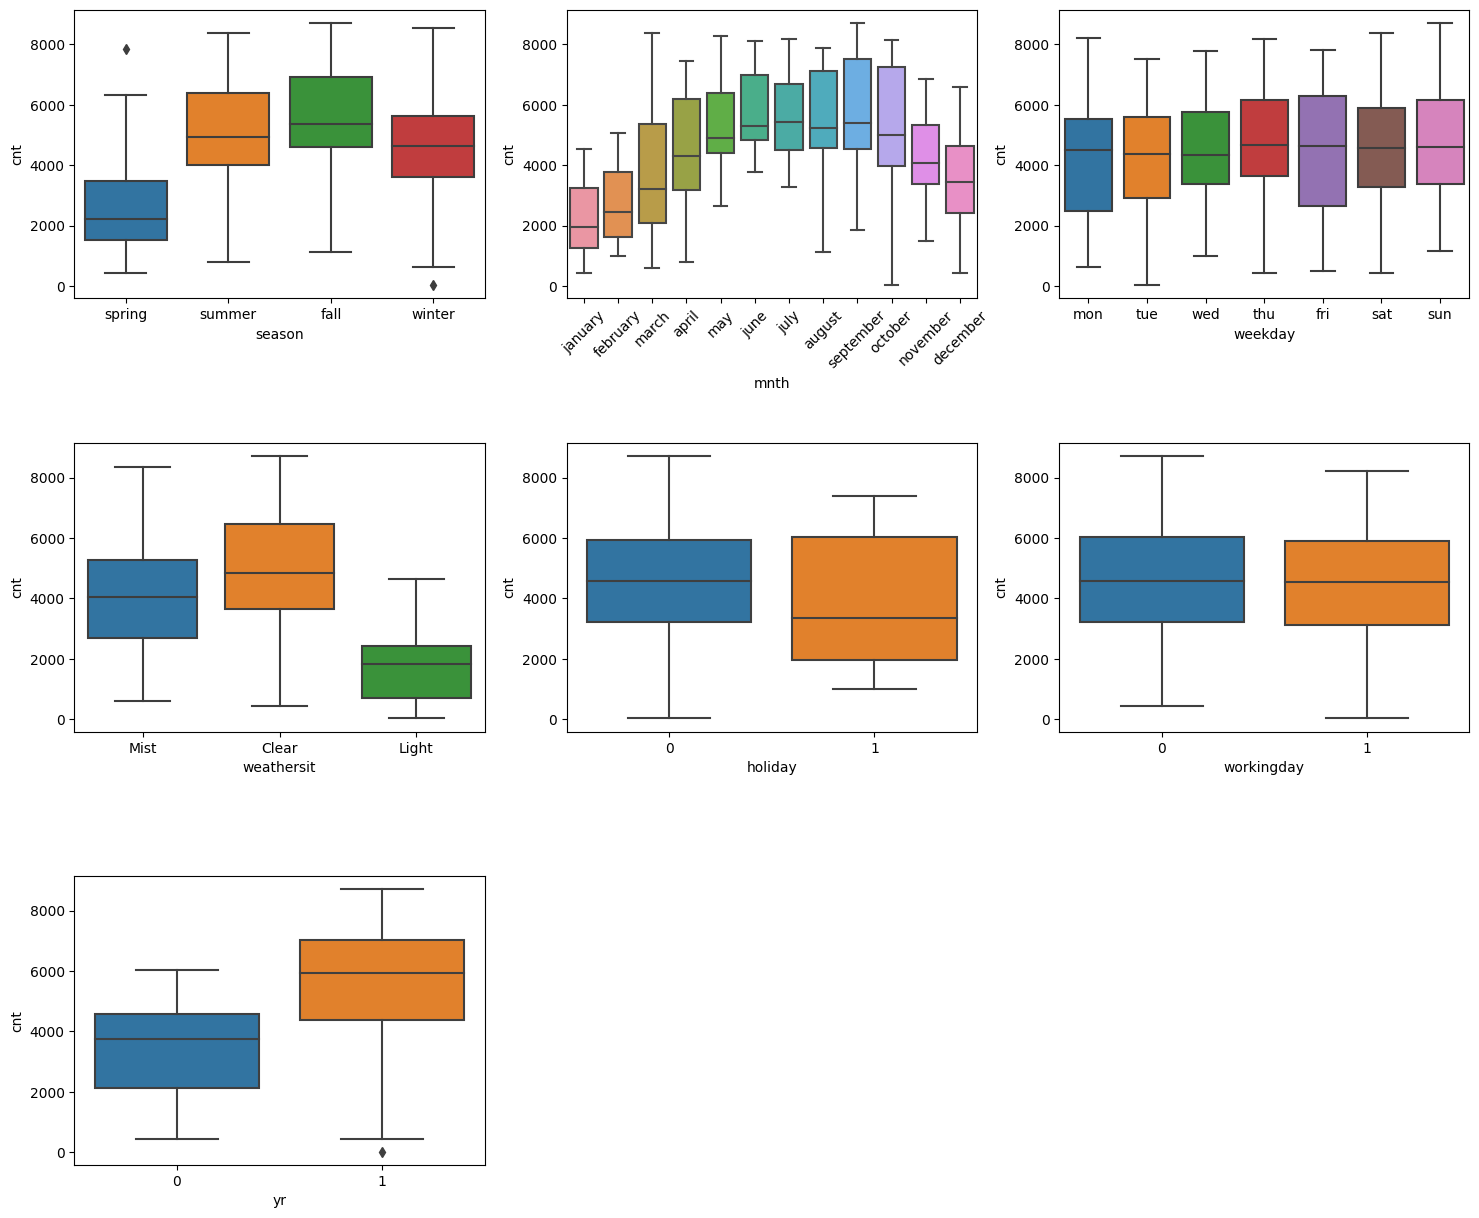

In [18]:
plt.figure(figsize=(18, 15))
plt.subplots_adjust(hspace=0.5)
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bsd_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bsd_df)
plt.xticks(rotation = 45)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bsd_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bsd_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bsd_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bsd_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bsd_df)
plt.show()

**We can also visualise some of these categorical features parallely by using the hue argument.**

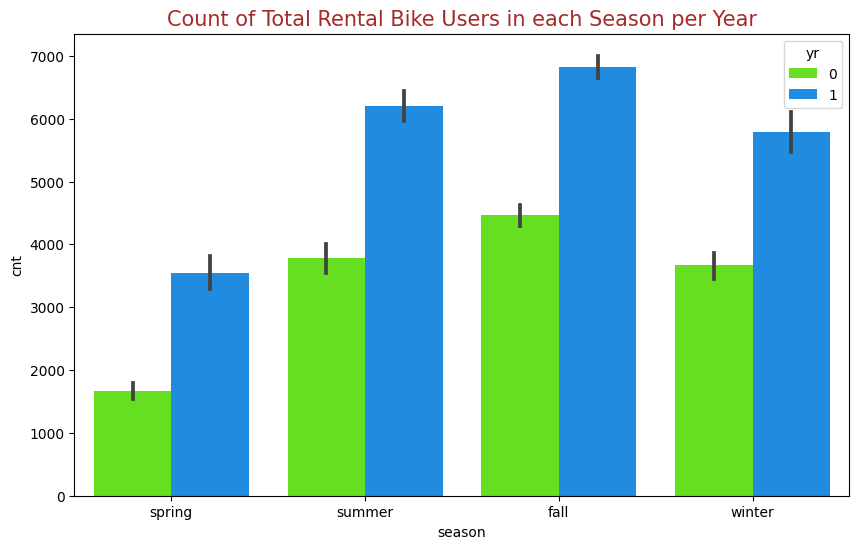

In [19]:
# Barplot for season vs Count of Total Rental Bike Users with year as the hue.

plt.figure(figsize = (10, 6))
plt.title('Count of Total Rental Bike Users in each Season per Year', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.barplot(x = 'season', y = 'cnt', hue = 'yr', data = bsd_df, palette = "gist_rainbow")
plt.show()

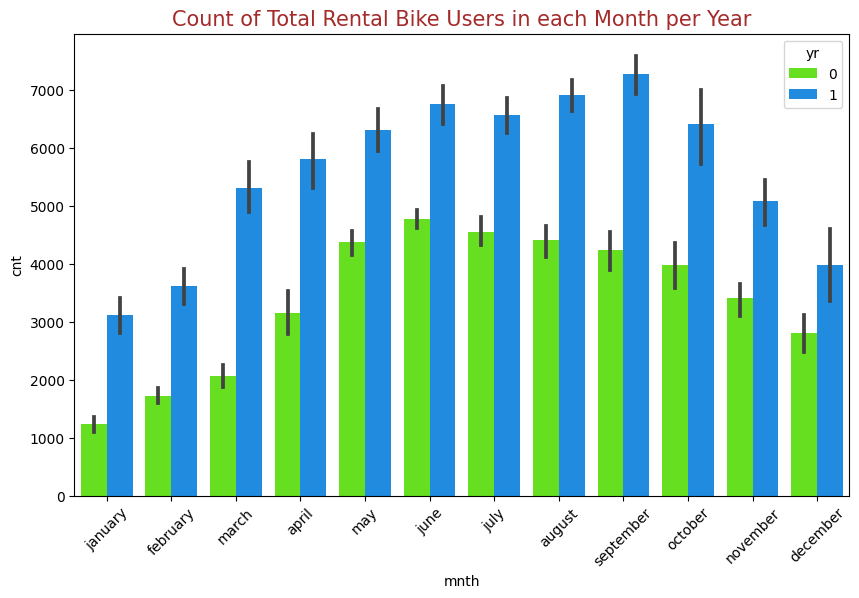

In [20]:
# Barplot for month vs Count of Total Rental Bike Users with year as the hue.

plt.figure(figsize = (10, 6))
plt.title('Count of Total Rental Bike Users in each Month per Year', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.barplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bsd_df, palette = "gist_rainbow")
plt.xticks(rotation = 45)
plt.show()

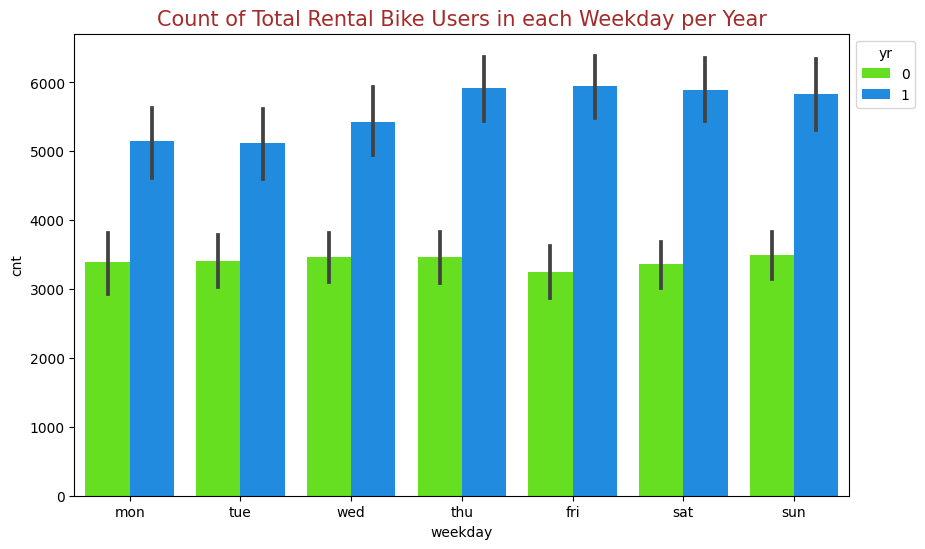

In [21]:
# Barplot for weekday vs Count of Total Rental Bike Users with year as the hue.

plt.figure(figsize = (10, 6))
plt.title('Count of Total Rental Bike Users in each Weekday per Year', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.barplot(x = 'weekday', y = 'cnt', hue = 'yr', data = bsd_df, palette = "gist_rainbow")
plt.legend(bbox_to_anchor=(1,1), title = 'yr')
plt.show()

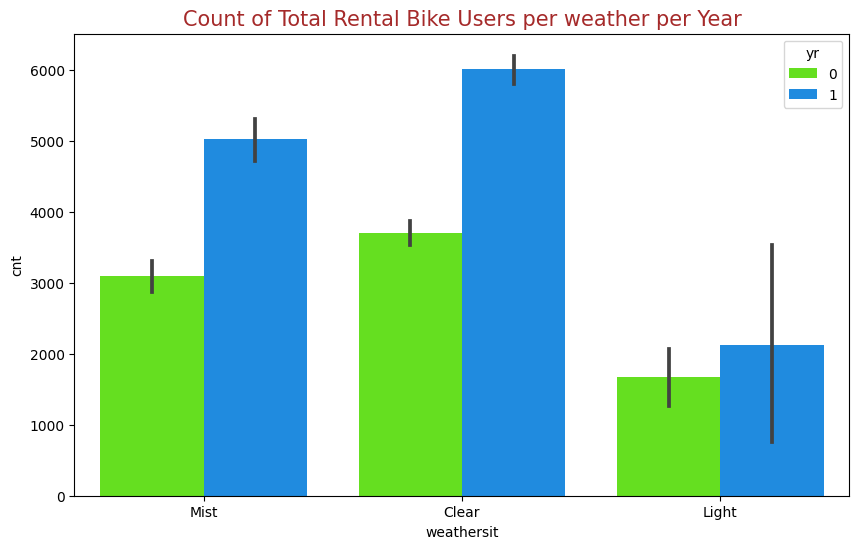

In [22]:
# Barplot for weathersit vs Count of Total Rental Bike Users with year as the hue.

plt.figure(figsize = (10, 6))
plt.title('Count of Total Rental Bike Users per weather per Year', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.barplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = bsd_df, palette = "gist_rainbow")
plt.show()

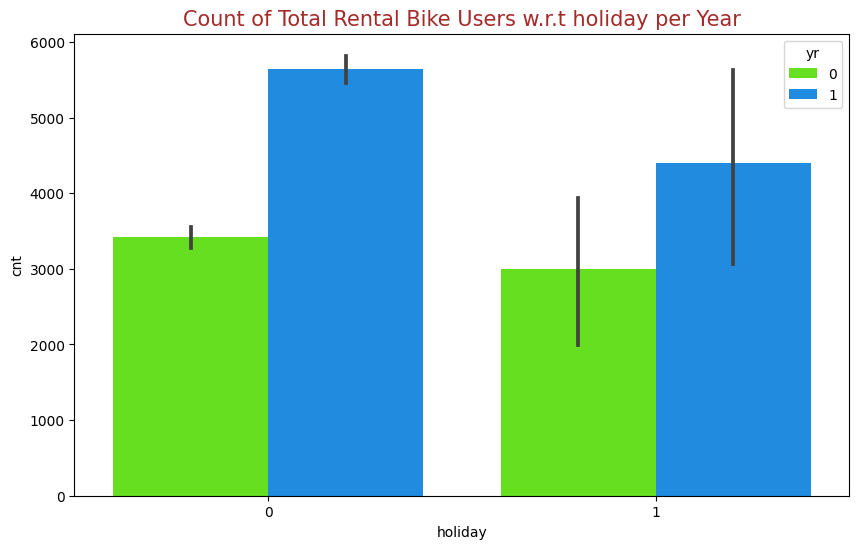

In [23]:
# Barplot for Holiday vs Count of Total Rental Bike Users with year as the hue.

plt.figure(figsize = (10, 6))
plt.title('Count of Total Rental Bike Users w.r.t holiday per Year', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.barplot(x = 'holiday', y = 'cnt', hue = 'yr', data = bsd_df, palette = "gist_rainbow")
plt.show()

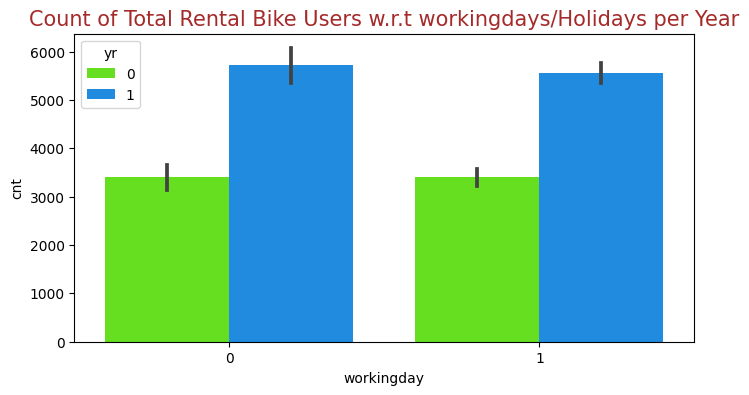

In [24]:
# Barplot for working day vs Count of Total Rental Bike Users with year as the hue.

plt.figure(figsize = (8, 4))
plt.title('Count of Total Rental Bike Users w.r.t workingdays/Holidays per Year', fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Brown'})
sns.barplot(x = 'workingday', y = 'cnt', hue = 'yr', data = bsd_df, palette = "gist_rainbow")
plt.show()

**From the above boxplots and barplots we can derive the insights given below:**
    

**Season** - Season 'fall' has the highest demand where as  season 'spring' has the lowest demand for rental bikes. There is a substantial increase in the demand as the year progressed from 2018 to 2019.

**Month** - The plots showed an increasing trend from starting of the year till mid of the year with most of the bookings  done during the month of may, june, july, aug, sep and oct and then it started decreasing as we approached the end of year.  August has the highest demand for rental bikes. There is a substantial increase in the demand per month as the year progressed from 2018 to 2019.

**Weekdays** - Thursdays, Fridays, Saturdays and Sundays has more demand compared to other weekdays.

**Weather** - Clear weather attracted more booking which is natural.There is a increase in the demand for each weather situation as the year progressed from 2018 to 2019.

**Holiday** - Holidays have more bookings compared to working days.

**Working Days** = No of bookings seemed to be almost similar either on working day or non-working day. But the count increased from 2018 to 2019.

**Year** - 2019 attracted more number of booking compared to 2018, which shows good progress in terms of business.


## <font color='indigo'>Data Preparation

In [25]:
bsd_df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### <font color='green'>Dummy Variables

The variable `season`, `mnth`, `weekday` and `weathersit` has more than one level. We need to convert these levels into integer as well. For this, we will use something called dummy variables.

In [26]:
# Getting dummy variables for the vars ''season','mnth','weekday','weathersit' and store it in a new variable called bsd_df_dummy

bsd_df_dummy = bsd_df[['season','mnth','weekday','weathersit']]

bsd_df_dummy = pd.get_dummies(bsd_df_dummy,drop_first=True, dtype=int)

bsd_df_dummy


,season_spring,season_summer,season_winter,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,...,mnth_october,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# Add the results to the original bsd_df  dataframe
bsd_df = pd.concat([bsd_df, bsd_df_dummy], axis = 1)
bsd_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_october,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
0,spring,0,january,0,mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [28]:
bsd_df.shape

(730, 34)

In [29]:
# Drop vars ''season','mnth','weekday','weathersit' as we have created the dummies for it

bsd_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

bsd_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
bsd_df.shape

(730, 30)

In [31]:
bsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_spring     730 non-null    int32  
 9   season_summer     730 non-null    int32  
 10  season_winter     730 non-null    int32  
 11  mnth_august       730 non-null    int32  
 12  mnth_december     730 non-null    int32  
 13  mnth_february     730 non-null    int32  
 14  mnth_january      730 non-null    int32  
 15  mnth_july         730 non-null    int32  
 16  mnth_june         730 non-null    int32  
 1

## <font color='indigo'>Splitting the Data into Training and Testing Sets

In [32]:
# splitting the dataframe into Train and Test

df_train, df_test = train_test_split(bsd_df, train_size = 0.7, random_state = 100)

In [33]:
df_train.shape

(510, 30)

In [34]:
df_test.shape

(220, 30)

Here we can see that except for `temp`, `atemp`, `hum`, `windspeed` and `cnt` all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [35]:
# using MinMax scaling.

scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the columns containing 0 and 1 only.

bsd_df_sc = ['temp','atemp','hum','windspeed', 'cnt']

In [37]:
df_train[bsd_df_sc] = scaler.fit_transform(df_train[bsd_df_sc])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


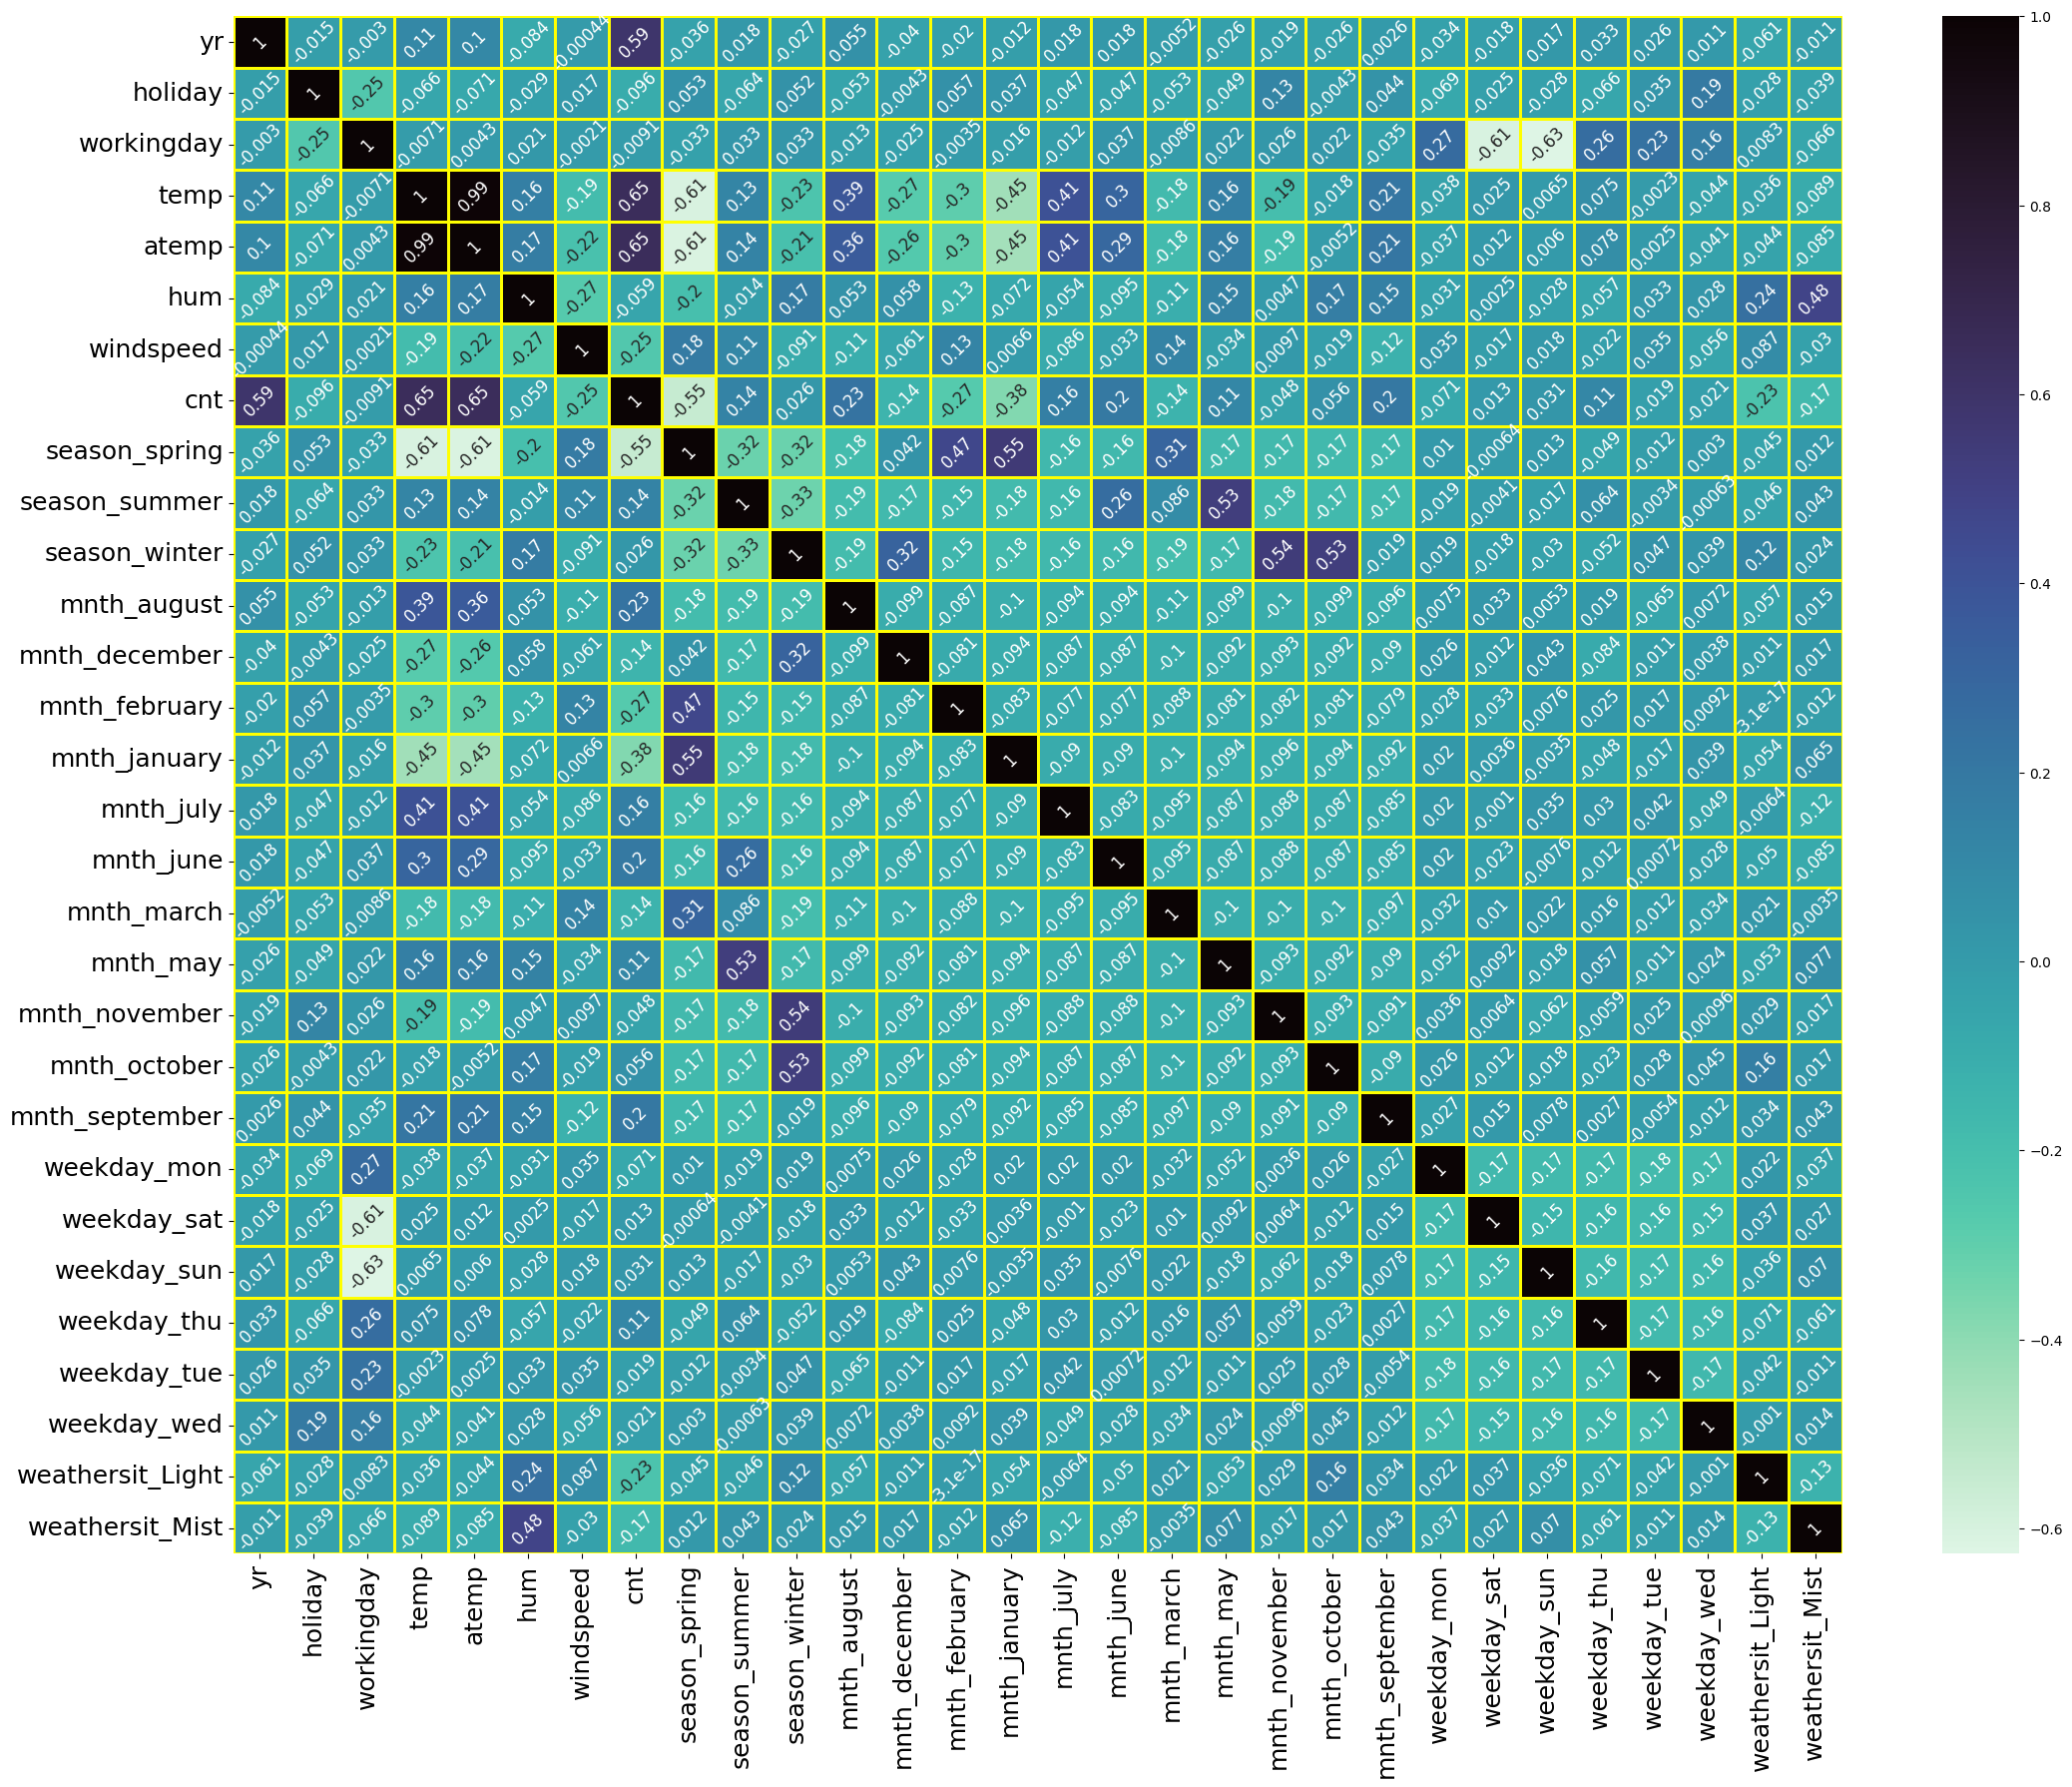

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26,20))
sns.heatmap(df_train.corr(),  annot=True, annot_kws={'size': 12,'rotation':45}, cmap="mako_r", linewidth = 1, linecolor="yellow").tick_params(labelsize=18)
plt.show()

**From the above heatmap we can derive the insights given below:**

 - The heatmap clearly shows the variables that have high collinearity with the target variable.
 - `temp` and `atemp` has high correlation with target variable `cnt`.
 - `season_spring` is positively correlated with `month_january`.
 - `season_winter` is positively correlated with `month_october` and `month_november`.
 - `season_summer` is positively correlated with `month_may`.
 - `yr` and `cnt` is positively correlated.
 - `workingday` is negetively correlated with `weekday_sat` and `weekday_sun`.
 - `temp` and `atemp` are negetively correlated with `spring_summer`.

### <font color='indigo'>Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                510 non-null    int64  
 1   holiday           510 non-null    int64  
 2   workingday        510 non-null    int64  
 3   temp              510 non-null    float64
 4   atemp             510 non-null    float64
 5   hum               510 non-null    float64
 6   windspeed         510 non-null    float64
 7   season_spring     510 non-null    int32  
 8   season_summer     510 non-null    int32  
 9   season_winter     510 non-null    int32  
 10  mnth_august       510 non-null    int32  
 11  mnth_december     510 non-null    int32  
 12  mnth_february     510 non-null    int32  
 13  mnth_january      510 non-null    int32  
 14  mnth_july         510 non-null    int32  
 15  mnth_june         510 non-null    int32  
 16  mnth_march        510 non-null    int32  
 17  

In [43]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### <font color='indigo'>Building our model
    


Fit a regression line through the training data using `statsmodels`.

In [44]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const               0.391457
yr                  0.231219
holiday            -0.134550
workingday         -0.060477
temp                0.387322
atemp               0.054682
hum                -0.157869
windspeed          -0.180241
season_spring      -0.040876
season_summer       0.045834
season_winter       0.112118
mnth_august         0.029056
mnth_december      -0.044419
mnth_february      -0.037302
mnth_january       -0.064014
mnth_july          -0.027384
mnth_june           0.009707
mnth_march          0.001030
mnth_may            0.025551
mnth_november      -0.039543
mnth_october        0.005771
mnth_september      0.091563
weekday_mon        -0.024661
weekday_sat        -0.055720
weekday_sun        -0.049879
weekday_thu         0.004199
weekday_tue        -0.026122
weekday_wed        -0.010251
weathersit_Light   -0.249238
weathersit_Mist    -0.057807
dtype: float64

In [45]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          1.24e-177
Time:                        10:33:02   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3915      0.085  

Currently, we have almost 29 Predictors to Predict our outcome. Dropping these predictors one by one until we get the best model can be a hectic and long.

In order to simplify this process, we can use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)

We will use a mixed approach to build the model.

Here we are using `RFE` approach for feature selection and then we will use the `statsmodel` approach for building the model 

We are using the **Linear Regression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [47]:
# Running RFE with the output number of the variable equal to random number 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 10),
 ('mnth_december', True, 1),
 ('mnth_february', False, 2),
 ('mnth_january', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 12),
 ('mnth_march', False, 15),
 ('mnth_may', False, 9),
 ('mnth_november', True, 1),
 ('mnth_october', False, 13),
 ('mnth_september', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weathersit_Light',
       'weathersit_Mist'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_august', 'mnth_february', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_october', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### <font color='indigo'>Building model using statsmodel, for the detailed statistics

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [53]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [54]:
# Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          8.15e-189
Time:                        10:42:53   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3197      0.036  

In [55]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_december', 'mnth_january',
       'mnth_july', 'mnth_november', 'mnth_september', 'weathersit_Light',
       'weathersit_Mist'],
      dtype='object')

### <font color='indigo'> Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [56]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.77
4,hum,1.92
12,mnth_november,1.77
10,mnth_january,1.68
15,weathersit_Mist,1.57
9,mnth_december,1.50


**We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.**

In [57]:
# Dropping the variable `const` as it has a VIF value of 82.52 

In [58]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [59]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
14,weathersit_Mist,2.32
0,yr,2.09
11,mnth_november,1.85
9,mnth_january,1.75


In [60]:
# Dropping the variable `hum` as it has a VIF value of 30.89 

X_train_new1 = X_train_new.drop(['hum'], axis=1)

In [61]:
# Build a second fitted model

X_train_lm1 = sm.add_constant(X_train_new1)

lm_1 = sm.OLS(y_train, X_train_lm1).fit()

In [62]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          4.75e-186
Time:                        10:42:55   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2450      0.032  

In [63]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_november,1.81
8,mnth_january,1.66
9,mnth_july,1.59
13,weathersit_Mist,1.57


In [64]:
# Dropping the variable `season_summer`

X_train_new2 = X_train_new1.drop(['season_summer'], axis=1)

In [65]:
# Build a third fitted model

X_train_lm2 = sm.add_constant(X_train_new2)

lm_2 = sm.OLS(y_train, X_train_lm2).fit()

In [66]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 25 Jun 2023   Prob (F-statistic):          4.08e-186
Time:                        10:45:29   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2899      0.025  

In [67]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.55
4,season_spring,2.36
0,yr,2.06
9,mnth_november,1.81
7,mnth_january,1.65
12,weathersit_Mist,1.54
6,mnth_december,1.46
8,mnth_july,1.36


### <font color = 'green'> Conclusion:

 - Here we see that all the columns have a vif value less than 5.


 - VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## <font color = 'indigo'>Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
y_train_predict = lm_2.predict(X_train_lm2)

Text(0.5, 0, 'Errors')

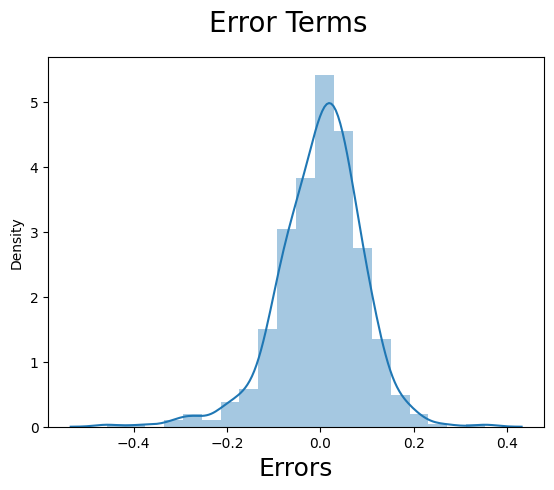

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

From the above we can understand that the error terms are centred around median 0 and follows a normal distribution and is in accordance with the assumptions of linear regression.

### <font color = 'green'> Homoscedasticity

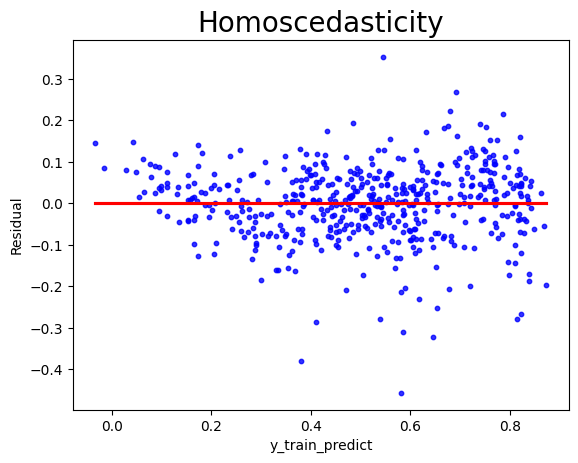

In [70]:

residual = y_train - y_train_predict
sns.regplot(x=y_train_predict, y=residual, ci=20, fit_reg=True,scatter_kws={"color": "blue", 's':10}, line_kws={"color": "red"})
plt.xlabel('y_train_predict')
plt.ylabel('Residual')
plt.title('Homoscedasticity', fontsize = 20) 
plt.show()

From the above plot that the datas are distributed equally along both sides of the best fit line(predicted values). 

There are no high or low concentration of residuals in certain regions which proves Homoscedasticity of Error Terms

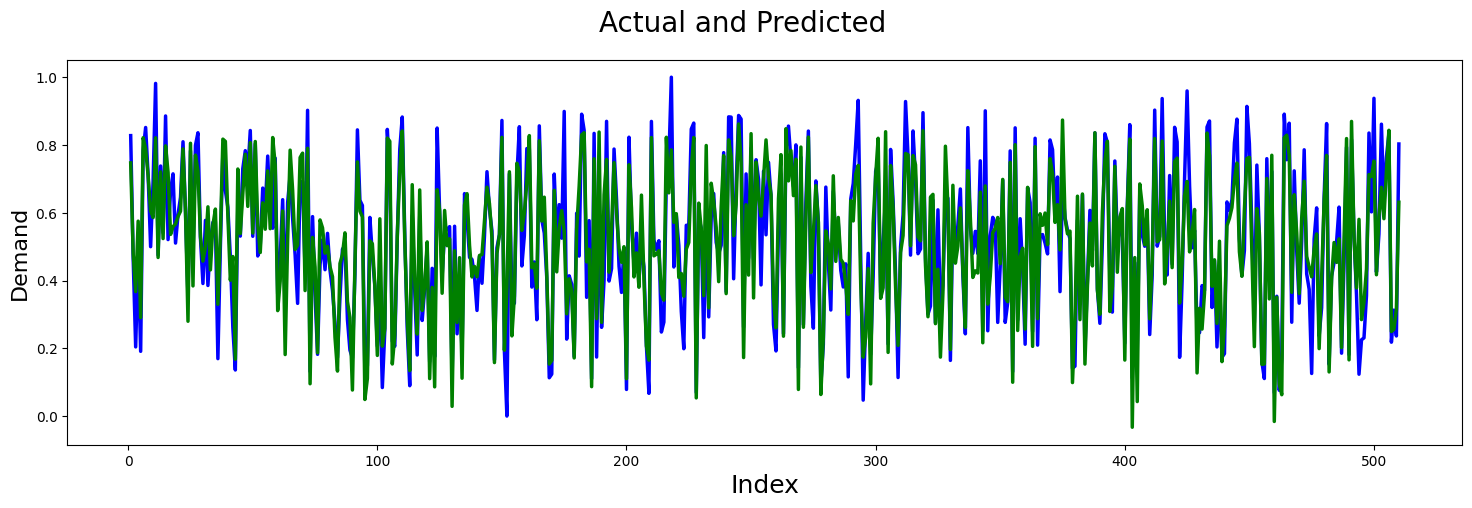

In [71]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (18, 5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_predict, color="green",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Demand', fontsize=16)                               # Y-label
plt.show()

We have a model that seems good enough to predict demand of bike sharing. The actual and predicted views significantly overlapped, thus indicating that the model is able to explain the demand of bike sharing very well.

## <font color = 'indigo'>Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

### <font color = 'green'> Applying the scaling on the test sets

In [72]:
num_vars = ['temp','atemp','hum','windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_october,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color = 'green'> Dividing into X_test and y_test

In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
X_test.shape

(220, 29)

In [77]:
# Making predictions using the third model

test_col = X_train_lm2.columns
X_test=X_test[test_col[1:]]


In [78]:
X_test.shape

(220, 13)

In [79]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             220 non-null    float64
 1   yr                220 non-null    int64  
 2   holiday           220 non-null    int64  
 3   temp              220 non-null    float64
 4   windspeed         220 non-null    float64
 5   season_spring     220 non-null    int32  
 6   season_winter     220 non-null    int32  
 7   mnth_december     220 non-null    int32  
 8   mnth_january      220 non-null    int32  
 9   mnth_july         220 non-null    int32  
 10  mnth_november     220 non-null    int32  
 11  mnth_september    220 non-null    int32  
 12  weathersit_Light  220 non-null    int32  
 13  weathersit_Mist   220 non-null    int32  
dtypes: float64(3), int32(9), int64(2)
memory usage: 18.0 KB


In [80]:
# Making predictions using the final model

y_pred_m3 = lm_2.predict(X_test)

## <font color = 'indigo'>Model Evaluation

Let's now plot the graph for actual versus predicted values.

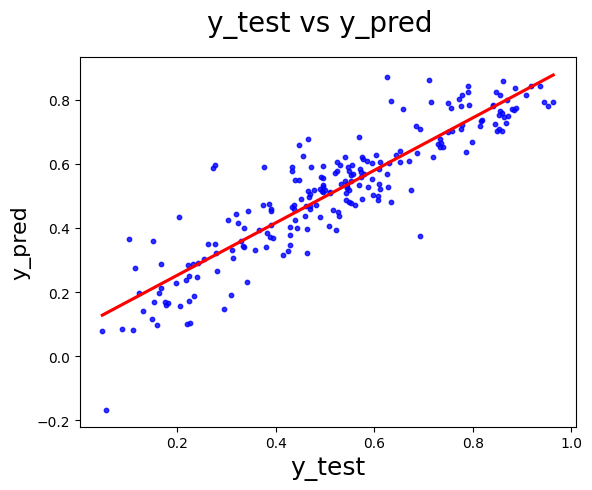

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_m3, ci=20, fit_reg=True,scatter_kws={"color": "blue", 's':10}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()



From the above plot that the residuals are distributed equally along both sides of the best fit line(predicted values). We can conclude that the model has decent predictive power. 

### <font color = 'green'> Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models.

In [82]:
# Find out the R squared value between test and predicted test data sets.  

r2_score(y_test, y_pred_m3)

0.8168467859803918

In [83]:
# Find out the R squared value between trained and predicted trained data sets.  

r2_score(y_train, y_train_predict)

0.837500370438736

<font color ='blue'> We can see that the <font color ='green'>r_squared on the test set is 0.817<font color ='blue'> and the <font color ='green'>r-squared on the trained set 0.837<font color ='blue'> which is almost equal, which implies that the linear regression model explains 81.7% of the variability in data. In other words, the linear regression model fits the data well. 

## <font color = 'Indigo'> Conclusion

We can see that the equation of our best fitted line is:

$ cnt = 0.2899 + 0.2350  \times  yr - 0.0911  \times  holiday + 0.4019 \times temp - 0.1537 \times windspeed  - 0.1046 \times seasonspring + 0.0621 \times seasonwinter - 0.0496 \times mnthdecember - 0.0556 \times mnthjanuary - 0.0647 \times mnthjuly - 0.0469 \times mnthnovember + 0.0534 \times mnthseptember - 0.2939 \times weathersitLight - 0.0798 \times weathersitMist $ 

- An increase in **Positive coefficient values** will lead to an increase in the value of count of total rental bikes.
<br />

- An increase in **Negative coefficient values** will lead to an decrease in the value of count of total rental bikes.
<br />

- We can see that the `r_squared on the test set is 0.817` and the `r-squared on the trained set 0.838` which is almost equal, which implies that the linear regression model explains 81.7% of the variability in data. In other words, the linear regression model fits the data well.
<br />

**Finally we can conclude that temperature, year and weather situation play a major role in predicting the demand of rental bikes.** 


## <font color = 'Indigo'> Recommendations

**Season** - Season 'fall' has the highest demand where as season 'spring' has the lowest demand for rental bikes. Management should  focus more on season 'fall' because of the high demand.

**Month** - The plots showed an increasing trend from starting of the year till mid of the year with most of the bookings done during the month of may, june, july, aug, sep and oct and then it started decreasing as we approached the end of year. August has the highest demand for rental bikes. Management should  focus more on months may, june, july, aug, sep and oct because of the high demand.

**Weather** - Clear weather attracts more booking.Management should keep an eye out on the weather.

**Holiday** - Holidays have more bookings compared to working days.Management should focus more on holidays due to the high demand

**Year** - 2019 attracted more number of booking compared to 2018, which shows good progress in terms of business.